# Ames, Iowa : Predicting Sales Prices - Linear Regression Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from LR_helper import cat_column_combine_vars, num_new_features, label_encode_features
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

## Loading training and testing datasets:-

In [2]:
train_df = pd.read_csv("clean_train.csv",index_col=0)
test_df = pd.read_csv("clean_test.csv",index_col=0)

## Viewing and checking datasets:-

In [3]:
train_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1453, 80)

In [5]:
test_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,Inside,...,144,0,No Pool,No Fence,None,0,1,2010,WD,Normal


In [6]:
test_df.shape

(1457, 79)

In [7]:
# train_df.info()

In [8]:
# test_df.info()

## Creating a second copy (both dfs) which will be used for baseline models

In [9]:
train_cpy = train_df.copy()
test_cpy = test_df.copy()

## Numerical variable work:

- New Feature: sold_age = Age of the house when it was sold
- New Feature: Usable space = BsmtFinSF + GrLivArea + 1stFlrSF + 2ndFlrSF
- Total_Halfbaths = sum of all half baths
- Total_Fullbaths = sum of all full baths
- Total porch area = sum of all enclosed porch areas
- BsmtFinSF = sum of Type 1 and Type 2 finished basement area

In [10]:
num_new_features(train_df)
num_new_features(test_df)

<AxesSubplot:>

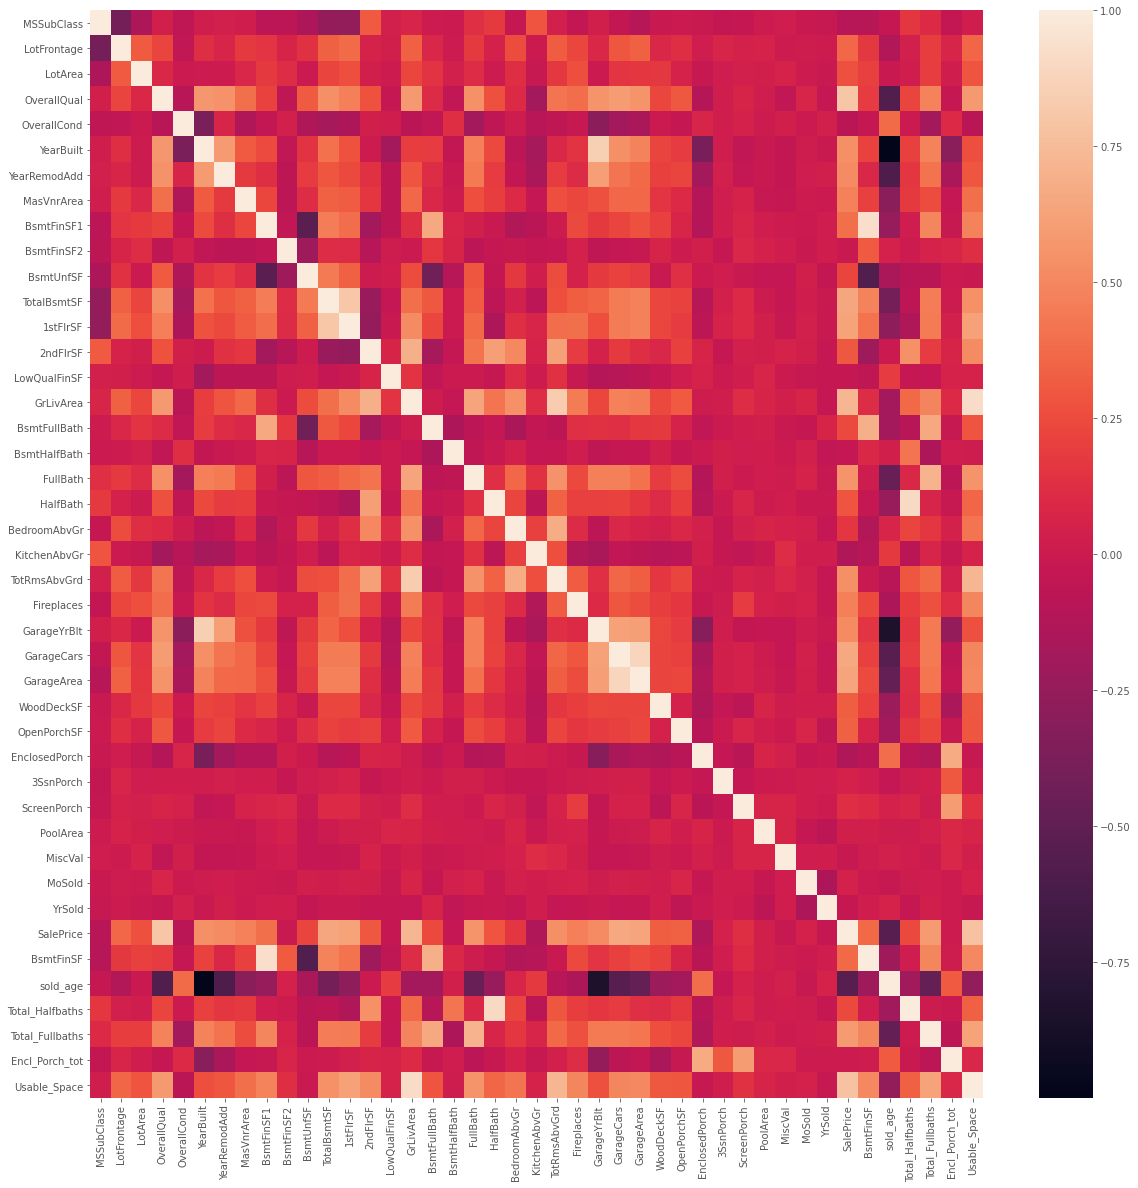

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr())

## Categorical values options

- Use one of Condition column, same as exterior below

In [12]:
# train_df['Exterior1st'].value_counts()
# train_df['Exterior2nd'].value_counts()

## Combining variables to one string value in some categorical columns:-

- For LandContour column replacing values other than lvl to notlvl.
- For Heating column replacing values other than GasA to Heat_othr.
- For Electrical column replacing values other than SBrkr to Electr_othr. 
- For PavedDrive column replacing values other than Y to NP

In [13]:
cat_column_combine_vars(train_df)
cat_column_combine_vars(test_df)

### Ordinal categories for Label-Encoding:
- LotShape, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, 
- BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, 
- GarageCond, PoolQC

In [14]:
train_df[['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',\
        'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2',\
        'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond',\
        'PoolQC']]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,No Fireplace,TA,TA,No Pool
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,TA,TA,No Pool
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,TA,TA,No Pool
3,IR1,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Gd,TA,TA,No Pool
4,IR1,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,TA,TA,No Pool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Ex,TA,TA,TA,TA,No Pool
1456,Reg,Gtl,TA,TA,Gd,TA,No,ALQ,Rec,TA,TA,TA,TA,TA,No Pool
1457,Reg,Gtl,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,Gd,TA,TA,No Pool
1458,Reg,Gtl,TA,TA,TA,TA,Mn,GLQ,Rec,Gd,Gd,No Fireplace,TA,TA,No Pool


In [15]:
label_encode_features(train_df)
label_encode_features(test_df)

In [16]:
train_df[['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',\
        'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2',\
        'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond',\
        'PoolQC']]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,3,0,2,4,2,4,3,2,6,0,2,3,5,5,3
1,3,0,3,4,2,4,1,0,6,0,3,5,5,5,3
2,0,0,2,4,2,4,2,2,6,0,2,5,5,5,3
3,0,0,3,4,4,1,3,0,6,2,2,2,5,5,3
4,0,0,2,4,2,4,0,2,6,0,2,5,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,0,3,4,2,4,3,6,6,0,3,5,5,5,3
1456,3,0,3,4,2,4,3,0,5,4,3,5,5,5,3
1457,3,0,0,2,4,1,3,2,6,0,2,2,5,5,3
1458,3,0,3,4,4,4,2,2,5,2,2,3,5,5,3


## Nominal categories for One-Hot-Encoding:

- MSSubClass, MSZoning, Street, Alley, LandContour, Utilities, LotConfig,
- Neighborhood, Condition1, Condition2, BldgType, HouseStyle, YearBuilt, YearRemodAdd, RoofStyle, 
- RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, CentralAir,Heating, Electrical, 
- Functional, GarageType, GarageFinish, PavedDrive, Fence, MiscFeature, MoSold, YrSold,
- SaleType, SaleCondition

In [24]:
train_df[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour',\
        'Utilities', 'LotConfig','Neighborhood', 'Condition1', 'Condition2',\
        'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',\
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',\
        'CentralAir','Heating', 'Electrical', 'Functional', 'GarageType',\
        'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',\
        'SaleType', 'SaleCondition']].head(5)

KeyError: "None of [Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities',\n       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',\n       'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',\n       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir',\n       'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',\n       'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',\n       'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [18]:
print(train_df.shape)
print(test_df.shape)

(1453, 86)

In [20]:
col_list = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour',\
            'Utilities', 'LotConfig','Neighborhood', 'Condition1', 'Condition2',\
            'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',\
            'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',\
            'CentralAir','Heating', 'Electrical', 'Functional', 'GarageType',\
            'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',\
            'SaleType', 'SaleCondition']

train_df = pd.get_dummies(data=train_df, columns=col_list, drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=col_list, drop_first=True)

In [21]:
print(train_df.shape)
print(test_df.shape)

(1453, 403)